In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [6]:
from numpy.random import rand, randn

In [7]:
n, d, k = 100, 2, 2

In [19]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]]), array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]])]


Solution
===

In [60]:
def compute_log_p(X, mean, sigma):
    res = []
    for i in range(X.shape[0]):
        q = 1 / (np.power(2 * np.pi, d/2) * np.power(np.linalg.det(sigma), 1/2)) 
        e = np.exp((-1/2) * np.transpose(X[i,:] - mean) * np.linalg.inv(sigma) * (X[i,:] - mean))
        res.append(q * e)
    return res

In [61]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

print(log_ps)

[[array([[ 3.35918167,  4.75033212],
       [ 4.75033212,  4.01797677]]), array([[ 1.6569871 ,  4.75033212],
       [ 4.75033212,  4.59950107]]), array([[  1.86581035e-05,   4.75033212e+00],
       [  4.75033212e+00,   4.61773079e+00]]), array([[ 0.26087544,  4.75033212],
       [ 4.75033212,  3.09720605]]), array([[ 4.5317897 ,  4.75033212],
       [ 4.75033212,  0.4111862 ]]), array([[ 0.02751237,  4.75033212],
       [ 4.75033212,  4.70943842]]), array([[ 3.88441474,  4.75033212],
       [ 4.75033212,  4.40110535]]), array([[ 4.02417164,  4.75033212],
       [ 4.75033212,  0.08528936]]), array([[  3.22517555e-04,   4.75033212e+00],
       [  4.75033212e+00,   4.75032318e+00]]), array([[ 0.01198786,  4.75033212],
       [ 4.75033212,  0.68165088]]), array([[ 2.3229736 ,  4.75033212],
       [ 4.75033212,  3.49035606]]), array([[ 2.79036855,  4.75033212],
       [ 4.75033212,  0.35962996]]), array([[ 4.10933795,  4.75033212],
       [ 4.75033212,  2.79912594]]), array([[ 4.17552997,  

In [62]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[[[0 0]
  [0 0]]

 [[0 0]
  [0 0]]

 [[1 0]
  [0 0]]

 [[1 0]
  [0 0]]

 [[0 0]
  [0 1]]

 [[1 0]
  [0 0]]

 [[0 0]
  [0 0]]

 [[0 0]
  [0 1]]

 [[1 0]
  [0 0]]

 [[1 0]
  [0 1]]

 [[0 0]
  [0 0]]

 [[0 0]
  [0 1]]

 [[0 0]
  [0 0]]

 [[0 0]
  [0 0]]

 [[1 0]
  [0 0]]

 [[0 0]
  [0 0]]

 [[1 0]
  [0 1]]

 [[0 0]
  [0 0]]

 [[1 0]
  [0 0]]

 [[1 0]
  [0 1]]

 [[0 0]
  [0 0]]

 [[1 0]
  [0 1]]

 [[1 0]
  [0 0]]

 [[1 0]
  [0 0]]

 [[0 0]
  [0 1]]

 [[0 0]
  [0 1]]

 [[0 0]
  [0 0]]

 [[0 0]
  [0 0]]

 [[0 0]
  [0 0]]

 [[1 0]
  [0 0]]

 [[0 0]
  [0 1]]

 [[0 0]
  [0 0]]

 [[0 0]
  [0 0]]

 [[1 0]
  [0 1]]

 [[0 0]
  [0 1]]

 [[0 0]
  [0 0]]

 [[0 0]
  [0 0]]

 [[1 0]
  [0 0]]

 [[0 0]
  [0 0]]

 [[1 0]
  [0 0]]

 [[1 0]
  [0 0]]

 [[1 0]
  [0 1]]

 [[1 0]
  [0 1]]

 [[0 0]
  [0 1]]

 [[1 0]
  [0 1]]

 [[0 0]
  [0 0]]

 [[1 0]
  [0 1]]

 [[0 0]
  [0 0]]

 [[0 0]
  [0 0]]

 [[0 0]
  [0 1]]

 [[0 0]
  [0 1]]

 [[1 0]
  [0 1]]

 [[1 0]
  [0 0]]

 [[1 0]
  [0 1]]

 [[1 0]
  [0 1]]

 [[0 0]
  

ValueError: Invalid RGBA argument: array([['red', 'red'],
       ['red', 'red']], 
      dtype='<U5')

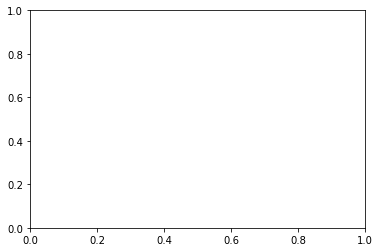

In [63]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()